## Work very much in progress

In [1]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
# Custom libraries
import CCM_GAH_lib as ccm
import data_handle_lib as dh

#### Two-species model system with synchrony

In [2]:
# Generate artificial data 

def f_x (f_x_prev, f_y_prev):
    return f_x_prev*(3.8 - 3.8*f_x_prev - 0.07*f_y_prev)

def f_y (f_x_prev, f_y_prev):
    return f_y_prev*(3.7 - 3.7*f_y_prev - 0.08*f_x_prev)

time_max = 3000
t = np.arange(time_max)
x = np.zeros(time_max)
x[0] = 0.2 # from supplementary materials
y = np.zeros(time_max)
y[0] = 0.4 # from supplementary materials

for i in range(time_max-1):
    x[i+1] = f_x(x[i], y[i])
    y[i+1] = f_y(x[i-1], y[i])

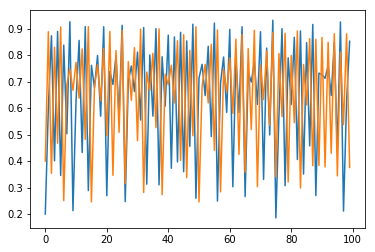

In [3]:
plt.plot(t[0:100], x[0:100])
plt.plot(t[0:100], y[0:100])
plt.show()

In [4]:
E = 2
tau = 1
start_i, stop_i = 2000, 2500

In [5]:
x_orig = x[start_i:stop_i]
y_orig = y[start_i:stop_i]

y_approx = ccm.generateYApprox(x_orig, y_orig, E=E, tau=tau, leaveOut=False)
x_approx = ccm.generateYApprox(y_orig, x_orig, E=E, tau=tau, leaveOut=False)

In [6]:
rho_xcrossy, rho_ycrossx = [], []
L_min, L_max = -8, 8
for L in np.arange(L_min, L_max):
    rho_xcrossy.append(pearsonr(y[start_i+(E - 1)-L:stop_i-L], y_approx)[0])
    rho_ycrossx.append(pearsonr(x[start_i+(E - 1)-L:stop_i-L], x_approx)[0])

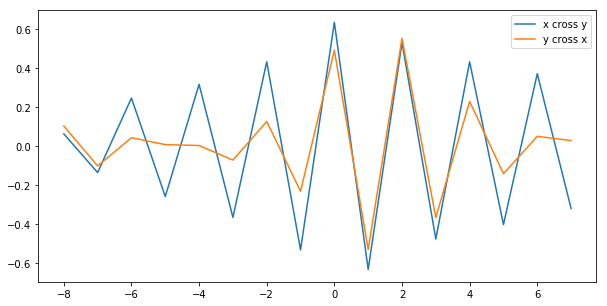

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(L_min, L_max), rho_xcrossy)
plt.plot(np.arange(L_min, L_max), rho_ycrossx)
plt.legend(["x cross y", "y cross x"])
plt.show()